In [4]:
library(tidyverse)
library(repr)
library(tidymodels)
library(rvest)
library(stringr)
library(DBI)
library(dbplyr)
library(tidyr)
library(gdata)

ERROR: Error in library(gdata): there is no package called ‘gdata’


# Prediction of leaf species


## Introduction

### Dataset

The present dataset describes the physical attributes of 40 different leaf species ranging from simple to complex leaves. Simple leaves are considered as having a single leaf while complex leaves subdivide into multiple leaflets from one stem. This project aims to use classification to determine whether shape features, texture features, or a combination of both are most accurate at predicting leaf species. 

More specifically, the predictors in question are solidity, aspect ratio, uniformity, and average contrast. In this context, solidity and aspect ratio describe leaf shape with solidity measuring how well a given leaf fits within a convex shape and aspect ratio referring to the ratio of the distance between the furthest perpendicular points on a leaf. Further, uniformity and average contrast describe leaf texture based on “statistical properties of the intensity histograms of grayscale transformations of the original RGB images” (Silva et al., 2013). Uniformity measures the similarity in intensity values and average contrast gives the standard deviation of intensity. 

Silva, P. F., Marçal, A. R., & da Silva, R. M. (2013). Evaluation of features for leaf discrimination. Springer Lecture Notes in Computer Science, 7950, 197–204. https://doi.org/10.1007/978-3-642-39094-4_23 


### Our research question

Are shape features, texture features, or a combination of both more accurate at predicting leaf species?

Shape features: Solidity and Aspect ratio

Texture features: Uniformity and Average contrast


# Preliminary exploratory data analysis:


In [18]:
#read dataset
leaf<-read_csv("leaf.csv") 

colnames(leaf) <- c(X1 = "class", X2 = "specimen", X3 = "eccentricity", X4 = "aspect_ratio", 
                         X5 = "elongation", X6 = "solidity", X7 = "sto_convexity", X8 = "iso_factor", 
                         X9 = "max_indent_depth", X10 = "lobedness", X11 = "ave_intensity", X12 = "ave_contrast", 
                         X13 = "smoothness", X14 = "3rd_moment", X15 =  "uniformity", X16 = "entropy")
leaf_data<-mutate(leaf,class=as_factor(class))
leaf_data



Warning message:
“Duplicated column names deduplicated: '1' => '1_1' [2], '1' => '1_2' [7]”
Parsed with column specification:
cols(
  `1` = col_double(),
  `1_1` = col_double(),
  `0.72694` = col_double(),
  `1.4742` = col_double(),
  `0.32396` = col_double(),
  `0.98535` = col_double(),
  `1_2` = col_double(),
  `0.83592` = col_double(),
  `0.0046566` = col_double(),
  `0.0039465` = col_double(),
  `0.04779` = col_double(),
  `0.12795` = col_double(),
  `0.016108` = col_double(),
  `0.0052323` = col_double(),
  `0.00027477` = col_double(),
  `1.1756` = col_double()
)



class,specimen,eccentricity,aspect_ratio,elongation,solidity,sto_convexity,iso_factor,max_indent_depth,lobedness,ave_intensity,ave_contrast,smoothness,3rd_moment,uniformity,entropy
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.0052423,0.0050016,0.0241600,0.090476,0.0081195,0.00270800,7.4846e-05,0.69659
1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.0074573,0.0101210,0.0118970,0.057445,0.0032891,0.00092068,3.7886e-05,0.44348
1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.0068768,0.0086068,0.0159500,0.065491,0.0042707,0.00115440,6.6272e-05,0.58785
1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.0074280,0.0100420,0.0079379,0.045339,0.0020514,0.00055986,2.3504e-05,0.34214
1,6,0.72997,1.4892,0.34284,0.98755,1.00000,0.84482,0.0049451,0.0044506,0.0104870,0.058528,0.0034138,0.00112480,2.4798e-05,0.34068
1,7,0.82063,1.7529,0.44458,0.97964,0.99649,0.76770,0.0059279,0.0063954,0.0183750,0.080587,0.0064523,0.00227130,4.1495e-05,0.53904
1,8,0.77982,1.6215,0.39222,0.98512,0.99825,0.80816,0.0050987,0.0047314,0.0248750,0.089686,0.0079794,0.00246640,1.4676e-04,0.66975
1,9,0.83089,1.8199,0.45693,0.98240,1.00000,0.77106,0.0060055,0.0065640,0.0072447,0.040616,0.0016469,0.00038812,3.2863e-05,0.33696
1,10,0.90631,2.3906,0.58336,0.97683,0.99825,0.66419,0.0084019,0.0128480,0.0070096,0.042347,0.0017901,0.00045889,2.8251e-05,0.28082


In [19]:
#Select the column we need

leaf_select<- leaf_data %>%
            select(class,specimen,solidity,aspect_ratio,ave_contrast,uniformity)
leaf_select

class,specimen,solidity,aspect_ratio,ave_contrast,uniformity
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,0.98152,1.5257,0.090476,7.4846e-05
1,3,0.97755,1.5725,0.057445,3.7886e-05
1,4,0.97566,1.4597,0.065491,6.6272e-05
1,5,0.97698,1.7707,0.045339,2.3504e-05
1,6,0.98755,1.4892,0.058528,2.4798e-05
1,7,0.97964,1.7529,0.080587,4.1495e-05
1,8,0.98512,1.6215,0.089686,1.4676e-04
1,9,0.98240,1.8199,0.040616,3.2863e-05
1,10,0.97683,2.3906,0.042347,2.8251e-05


In [21]:
##Spliting the data into "Training Data" and "Testing Data"
set.seed(100)
 
leaf_split <- initial_split(leaf_data, prop = 0.75, strata = "class")
leaf_train <- training(leaf_split)
leaf_test <- testing(leaf_split)


Warning message:
“Too little data to stratify. Unstratified resampling will be used.”


In [22]:
 
##Summarizing the Mean of the selected predictors that we are going to use in our prediction to compare the accuracies
 
leaf_train_mean <- leaf_train %>%
        group_by(class)%>%
        summarize(mean_solidity = mean(solidity), mean_aspect_ratio = mean(aspect_ratio), 
                  mean_uniformity = mean(uniformity), mean_ave_contrast = mean(ave_contrast))
leaf_train_mean



`summarise()` ungrouping output (override with `.groups` argument)



class,mean_solidity,mean_aspect_ratio,mean_uniformity,mean_ave_contrast
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.9806578,1.688511,5.297778e-05,0.05887033
2,0.9834875,2.251863,2.580389e-04,0.08884263
3,0.9206125,1.130450,1.559151e-04,0.14650288
4,0.9605643,1.278814,4.249357e-04,0.09762486
5,0.8336025,1.892075,2.697888e-04,0.13553750
6,0.7431186,1.155943,6.147314e-05,0.07042200
7,0.8834478,1.800556,1.501821e-04,0.10520300
8,0.9658790,6.206540,1.644665e-04,0.10001430
9,0.9042470,1.275700,6.766000e-04,0.15695100


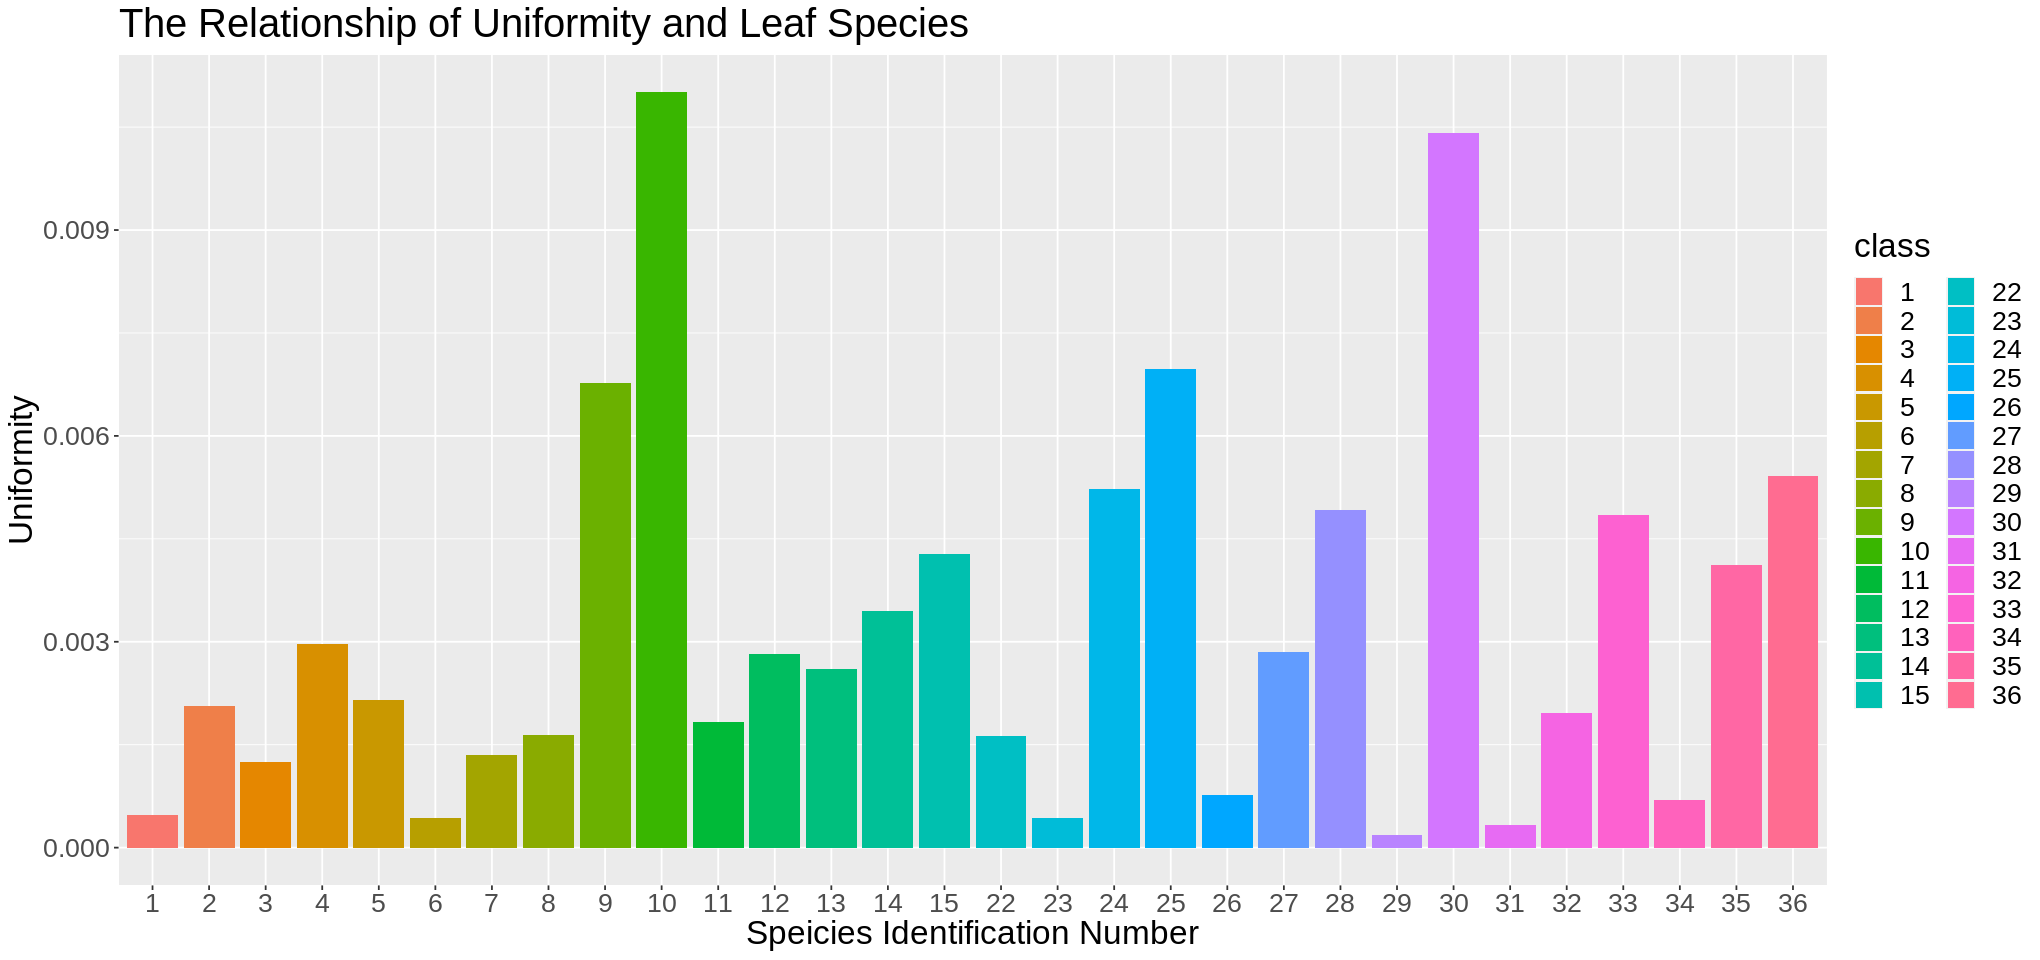

In [23]:
## Visualization of the Relationship of Uniformity and Leaf Species
options(repr.plot.height = 8, repr.plot.width = 17)
 
class_vs_uniformity <- ggplot(leaf_train, aes(x = class, y = uniformity, fill = class))+
        geom_bar(stat = "identity")+
        labs(x = "Speicies Identification Number", y = "Uniformity", fill = "class")+
        ggtitle("The Relationship of Uniformity and Leaf Species")+
        theme(text = element_text(size = 20))
class_vs_uniformity


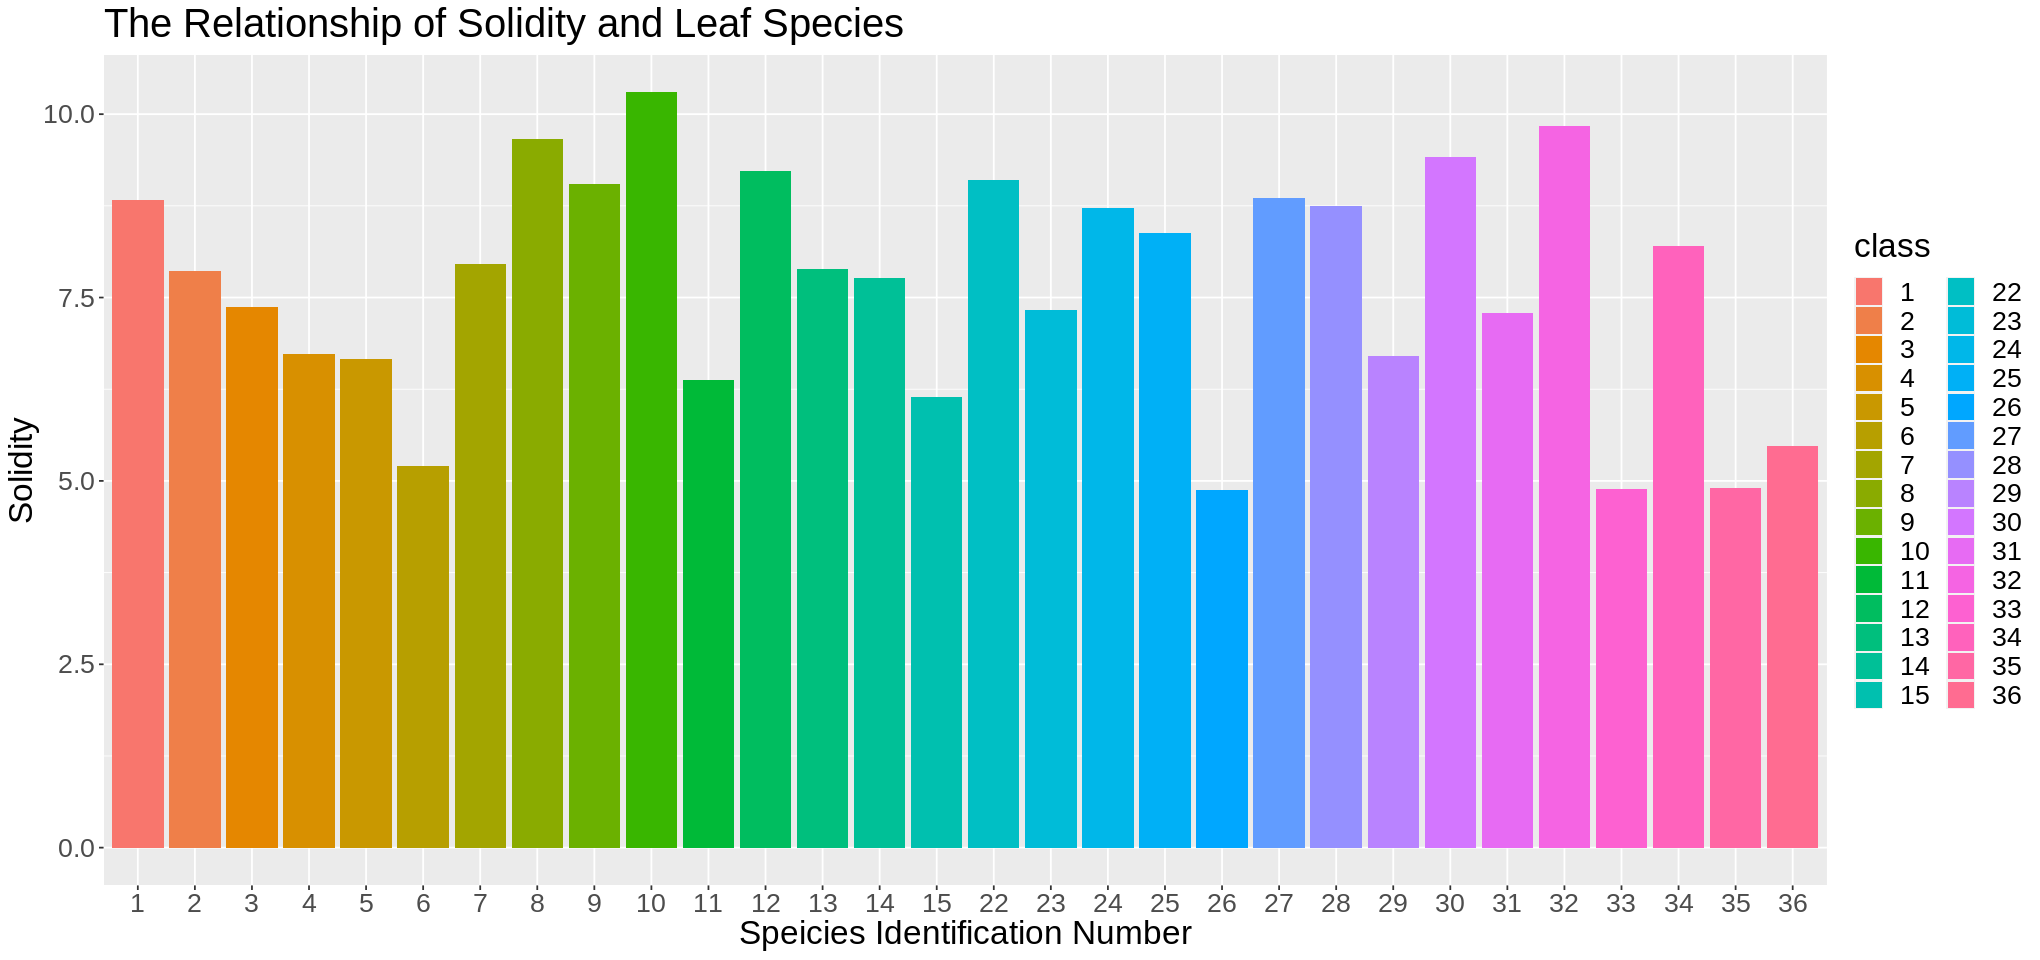

In [24]:
## Visualization of the Relationship of Solidity and Leaf Species
options(repr.plot.height = 8, repr.plot.width = 17)
 
class_vs_solidity <- ggplot(leaf_train, aes(x = class, y = solidity, fill = class))+
        geom_bar(stat = "identity")+
        labs(x = "Speicies Identification Number", y = "Solidity", fill = "class")+
        ggtitle("The Relationship of Solidity and Leaf Species")+
        theme(text = element_text(size = 20))
class_vs_solidity


In [30]:
leaf_resample<-sample(leaf_train,40,replace=TRUE,prob=NULL)
leaf_resample

eccentricity,uniformity,max_indent_depth,aspect_ratio,uniformity,entropy,ave_contrast,uniformity,entropy,aspect_ratio,⋯,uniformity,ave_contrast,max_indent_depth,3rd_moment,specimen,smoothness,solidity,solidity,ave_contrast,ave_intensity
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.74173,7.4846e-05,0.0052423,1.5257,7.4846e-05,0.69659,0.090476,7.4846e-05,0.69659,1.5257,⋯,7.4846e-05,0.090476,0.0052423,0.00270800,2,0.0081195,0.98152,0.98152,0.090476,0.0241600
0.76722,3.7886e-05,0.0074573,1.5725,3.7886e-05,0.44348,0.057445,3.7886e-05,0.44348,1.5725,⋯,3.7886e-05,0.057445,0.0074573,0.00092068,3,0.0032891,0.97755,0.97755,0.057445,0.0118970
0.73797,6.6272e-05,0.0068768,1.4597,6.6272e-05,0.58785,0.065491,6.6272e-05,0.58785,1.4597,⋯,6.6272e-05,0.065491,0.0068768,0.00115440,4,0.0042707,0.97566,0.97566,0.065491,0.0159500
0.72997,2.4798e-05,0.0049451,1.4892,2.4798e-05,0.34068,0.058528,2.4798e-05,0.34068,1.4892,⋯,2.4798e-05,0.058528,0.0049451,0.00112480,6,0.0034138,0.98755,0.98755,0.058528,0.0104870
0.82063,4.1495e-05,0.0059279,1.7529,4.1495e-05,0.53904,0.080587,4.1495e-05,0.53904,1.7529,⋯,4.1495e-05,0.080587,0.0059279,0.00227130,7,0.0064523,0.97964,0.97964,0.080587,0.0183750
0.83089,3.2863e-05,0.0060055,1.8199,3.2863e-05,0.33696,0.040616,3.2863e-05,0.33696,1.8199,⋯,3.2863e-05,0.040616,0.0060055,0.00038812,9,0.0016469,0.98240,0.98240,0.040616,0.0072447
0.90631,2.8251e-05,0.0084019,2.3906,2.8251e-05,0.28082,0.042347,2.8251e-05,0.28082,2.3906,⋯,2.8251e-05,0.042347,0.0084019,0.00045889,10,0.0017901,0.97683,0.97683,0.042347,0.0070096
0.74590,3.1839e-05,0.0055665,1.4927,3.1839e-05,0.25026,0.036511,3.1839e-05,0.25026,1.4927,⋯,3.1839e-05,0.036511,0.0055665,0.00030872,11,0.0013313,0.98296,0.98296,0.036511,0.0057679
0.79606,1.3855e-04,0.0077992,1.6934,1.3855e-04,0.49751,0.057832,1.3855e-04,0.49751,1.6934,⋯,1.3855e-04,0.057832,0.0077992,0.00081648,12,0.0033334,0.98181,0.98181,0.057832,0.0136770


# Method


We will build a classification model using the K-nearest neighbors algorithm to predict leaf species based on aspect ratio, solidity, average contrast, and uniformity. These predictors were chosen because we anticipate they will provide the most comprehensive and interpretable results between leaf species. More details of our expectations are as follows:

Aspect ratio:
Gives the most comprehensive measurement of the overall size of each leaf which will be useful in comparing leaves of different species.

Solidity:
By determining how well a leaf fits into the smallest possible convex shape we can compare leaves of a wide variety of shapes.

Average contrast:
The standard deviation of intensity will show which features of the leaf’s texture are most prominent.

Uniformity:
The similarity of intensity values will show the rigidity and uniqueness of the leaf’s texture.

Since our goal is examining which predictors have the best outcome of predicting the leaf species, our initial plan is to visualize a comparison between the accuracies that our classification model has predicted using bar charts. We are going to have the prediction accuracies on the y-axis, and the different predictors on the x-axis; we are also  going to color each bar so it is easier for us to differentiate between the different predictors. We acknowledge that the limited quantity of data in our dataset will skew the data, especially for the leaf species with fewer observations and that data may be replicated to fill the model in these situations.
We will resample it in the future study or try the bootstrap method.

# Expected Outcomes and Significance

We expect that texture attributes will provide a more accurate prediction of leaf species because of the distinct features observed between leaves. However, we also expect that our results will be skewed due to the small size of the dataset and the lack of stratification.

Our finding could benefit the field of botany so that botanists no longer have to go through the trouble of comparing leaves against long plant identification guides or performing DNA tests in order to identify a plant’s species based on leaves.

#### This analyzsis could prompt further questions:
What other factors not part of the model could significantly impact our predictions?

Are there other leaf traits not included in the dataset or model that will improve the accuracy of our model?

What factors are the best predictors of leaf species?

Could this model or a similar model be used to predict plant species based on other parts of a plant, like branches, flowers, or bark textures?